In [1]:
import time
import psutil
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

/var/folders/x3/f2fw5djs1k15pwdfct55236m0000gn/T/ipykernel_1133/3879953422.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('data_pca_10000x201.csv', sep=';')
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x192,x193,x194,x195,x196,x197,x198,x199,x200,y
0,"8,43","6,01","-2,72","0,72","4,21","-2,41","-13,92","-4,76","12,84","2,14",...,"205,61","-31,02","-55,51","-107,07","86,04","-194,53","-248,93","-201,57","-128,54","-17,03"
1,"10,2","2,8","3,69","4,78","-11,03","-0,59","0,23","-1,41",-1,"0,68",...,"121,37","-148,39","68,38","-51,78","115,29","6,08","-126,89","-26,54","-25,07","33,54"
2,"0,65","2,16","-4,61","7,55","-15,61","-1,78","5,94","-10,31","6,04","-14,88",...,"124,62","-56,07","-121,72","-39,61","95,11","-210,68","-184,6","294,36","-265,74","10,16"
3,"-2,55","-4,17","0,37","13,28","-0,99","4,19","6,62","-18,58","4,22","-14,8",...,"339,98","-17,28","20,72",-196,"154,71","-28,03","-382,79","80,13","-89,68","44,21"
4,"7,16","4,12","-12,33","4,42","-11,44","-0,41","-1,52","-6,19","-0,99","2,49",...,"235,38","50,33","69,94","-88,98","133,11","-92,09","-263,55","531,99","-26,01","127,59"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"0,89","-1,18","-8,19","10,37","-15,97","-9,01","-10,26","-6,03","2,18","-8,54",...,"158,45","43,78",-111,"-102,55","79,5","-153,3","-119,58","212,3","-218,68","24,19"
9996,"0,82","-0,6","-4,77","5,14","-10,15","-0,9","-4,39","-8,83","-1,7","-15,53",...,"119,58","-50,5","54,11","-44,12","54,07","-124,6","-14,02","190,87","-106,69","66,04"
9997,"1,05","-14,15","-4,79","7,77","1,96","10,08","-3,46","1,47","-3,21","-12,54",...,"-77,91","33,44","-8,62","91,63","33,38","-15,27","146,97","109,47","-51,95","40,98"
9998,"-5,03","5,64","-1,39","-0,13","-8,25","0,51","-2,18","-5,76","-3,28","-10,28",...,"22,41","-17,28","80,15","41,77","45,8","53,39","86,07","92,39",-66,"55,56"


In [3]:
for column in df.columns:
    df[column] = df[column].str.replace(',','.')
    df[column] = df[column].astype(float)

In [4]:
df['new_y'] = [0 if i < 0 else 1 for i in df['y']]
df

/var/folders/x3/f2fw5djs1k15pwdfct55236m0000gn/T/ipykernel_1133/1004132593.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['new_y'] = [0 if i < 0 else 1 for i in df['y']]


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x193,x194,x195,x196,x197,x198,x199,x200,y,new_y
0,8.43,6.01,-2.72,0.72,4.21,-2.41,-13.92,-4.76,12.84,2.14,...,-31.02,-55.51,-107.07,86.04,-194.53,-248.93,-201.57,-128.54,-17.03,0
1,10.20,2.80,3.69,4.78,-11.03,-0.59,0.23,-1.41,-1.00,0.68,...,-148.39,68.38,-51.78,115.29,6.08,-126.89,-26.54,-25.07,33.54,1
2,0.65,2.16,-4.61,7.55,-15.61,-1.78,5.94,-10.31,6.04,-14.88,...,-56.07,-121.72,-39.61,95.11,-210.68,-184.60,294.36,-265.74,10.16,1
3,-2.55,-4.17,0.37,13.28,-0.99,4.19,6.62,-18.58,4.22,-14.80,...,-17.28,20.72,-196.00,154.71,-28.03,-382.79,80.13,-89.68,44.21,1
4,7.16,4.12,-12.33,4.42,-11.44,-0.41,-1.52,-6.19,-0.99,2.49,...,50.33,69.94,-88.98,133.11,-92.09,-263.55,531.99,-26.01,127.59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.89,-1.18,-8.19,10.37,-15.97,-9.01,-10.26,-6.03,2.18,-8.54,...,43.78,-111.00,-102.55,79.50,-153.30,-119.58,212.30,-218.68,24.19,1
9996,0.82,-0.60,-4.77,5.14,-10.15,-0.90,-4.39,-8.83,-1.70,-15.53,...,-50.50,54.11,-44.12,54.07,-124.60,-14.02,190.87,-106.69,66.04,1
9997,1.05,-14.15,-4.79,7.77,1.96,10.08,-3.46,1.47,-3.21,-12.54,...,33.44,-8.62,91.63,33.38,-15.27,146.97,109.47,-51.95,40.98,1
9998,-5.03,5.64,-1.39,-0.13,-8.25,0.51,-2.18,-5.76,-3.28,-10.28,...,-17.28,80.15,41.77,45.80,53.39,86.07,92.39,-66.00,55.56,1


In [5]:
df.isnull().sum()

x1       0
x2       0
x3       0
x4       0
x5       0
        ..
x198     0
x199     0
x200     0
y        0
new_y    0
Length: 202, dtype: int64

In [6]:
df.shape

(10000, 202)

In [7]:
df = df.drop(['y'], axis = 1)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x192,x193,x194,x195,x196,x197,x198,x199,x200,new_y
0,8.43,6.01,-2.72,0.72,4.21,-2.41,-13.92,-4.76,12.84,2.14,...,205.61,-31.02,-55.51,-107.07,86.04,-194.53,-248.93,-201.57,-128.54,0
1,10.20,2.80,3.69,4.78,-11.03,-0.59,0.23,-1.41,-1.00,0.68,...,121.37,-148.39,68.38,-51.78,115.29,6.08,-126.89,-26.54,-25.07,1
2,0.65,2.16,-4.61,7.55,-15.61,-1.78,5.94,-10.31,6.04,-14.88,...,124.62,-56.07,-121.72,-39.61,95.11,-210.68,-184.60,294.36,-265.74,1
3,-2.55,-4.17,0.37,13.28,-0.99,4.19,6.62,-18.58,4.22,-14.80,...,339.98,-17.28,20.72,-196.00,154.71,-28.03,-382.79,80.13,-89.68,1
4,7.16,4.12,-12.33,4.42,-11.44,-0.41,-1.52,-6.19,-0.99,2.49,...,235.38,50.33,69.94,-88.98,133.11,-92.09,-263.55,531.99,-26.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.89,-1.18,-8.19,10.37,-15.97,-9.01,-10.26,-6.03,2.18,-8.54,...,158.45,43.78,-111.00,-102.55,79.50,-153.30,-119.58,212.30,-218.68,1
9996,0.82,-0.60,-4.77,5.14,-10.15,-0.90,-4.39,-8.83,-1.70,-15.53,...,119.58,-50.50,54.11,-44.12,54.07,-124.60,-14.02,190.87,-106.69,1
9997,1.05,-14.15,-4.79,7.77,1.96,10.08,-3.46,1.47,-3.21,-12.54,...,-77.91,33.44,-8.62,91.63,33.38,-15.27,146.97,109.47,-51.95,1
9998,-5.03,5.64,-1.39,-0.13,-8.25,0.51,-2.18,-5.76,-3.28,-10.28,...,22.41,-17.28,80.15,41.77,45.80,53.39,86.07,92.39,-66.00,1


In [9]:
X = df.drop(['new_y'],axis = 1)
y = df['new_y']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [11]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [12]:
start_time = time.time()
regr = LogisticRegression()
regr.fit(X_train, y_train)
time_without_pca = time.time() - start_time

In [13]:
y_pred = regr.predict(X_test)

In [14]:
df1 = pd.DataFrame(list(y_test),y_pred)
df1

,0
0,0
1,1
1,1
1,1
1,1
...,...
0,0
1,1
0,0
1,1


In [15]:
print('The R2 score is', r2_score(y_test, y_pred))
print('Time ', time_without_pca)

The R2 score is 0.9632476478494624
Time  0.1743450164794922
Memory 819200


In [16]:
time_pca_list = []
r2 = []

In [17]:
for i in range(1, df.shape[1], 5):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    start_time_pca = time.time()
    regr_pca = LogisticRegression()
    regr_pca.fit(X_train_pca, y_train)
    time_pca = time.time() - start_time_pca
    Y_pred_pca = regr_pca.predict(X_test_pca)
    r2.append(r2_score(y_test, Y_pred_pca))
    time_pca_list.append(time_pca)    

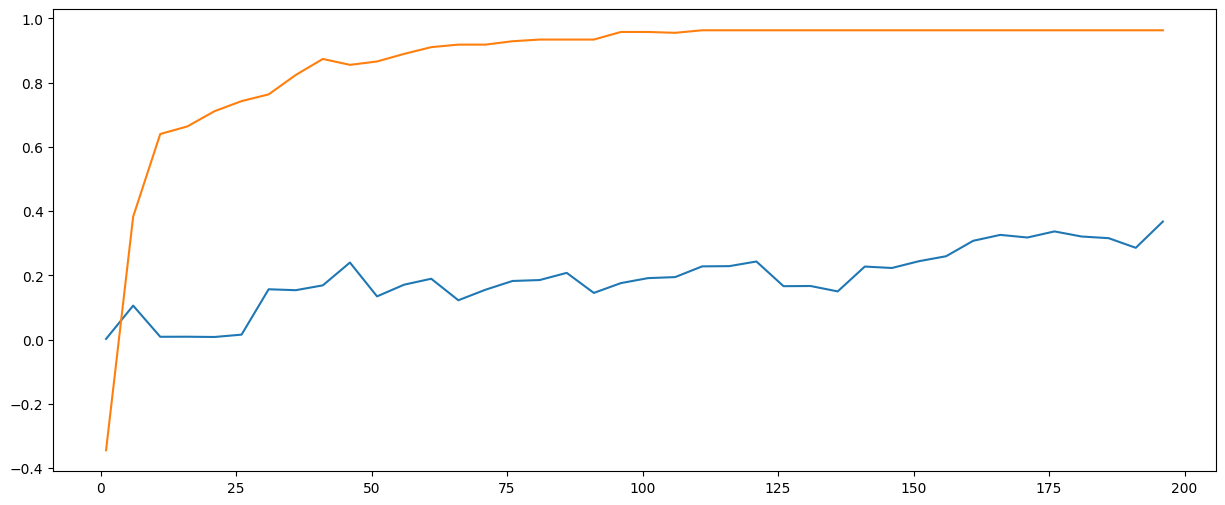

In [18]:
plt.figure(figsize=(15, 6))
plt.plot([i for i in range(1, df.shape[1], 5)], time_pca_list)
plt.plot([i for i in range(1, df.shape[1], 5)], r2)